# Ejercicio 7
El archivo automobile_simple.csv contiene 11 atributos de automóviles de un total de 205 registros. Es una
versión modificada y simplificada del dataset disponible en el repositorio UCI
https://archive.ics.uci.edu/ml/datasets/Automobile. La siguiente tabla contiene una breve descripción de los
atributos que contiene el archivo y caracterizan a cada vehículo.

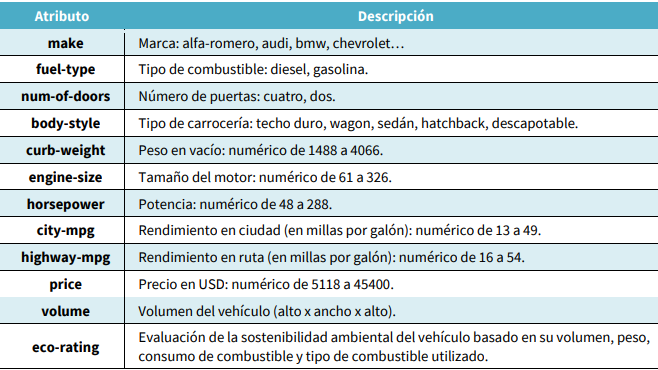


### a) 
Para cada atributo indique si es Discreto, Continuo, Nominal u Ordinal.

In [21]:
# EJERCICIO A - Clasificación de Atributos

import pandas as pd

# Crear tabla con la clasificación de atributos
clasificacion = pd.DataFrame({
    'Atributo': [
        'make',
        'fuel-type',
        'num-of-doors',
        'body-style',
        'curb-weight',
        'engine-size',
        'horsepower',
        'city-mpg',
        'highway-mpg',
        'price',
        'volume',
        'eco-rating'
    ],
    'Tipo': [
        'Nominal',          # make: categorías sin orden (alfa-romero, audi, bmw...)
        'Nominal',          # fuel-type: categorías sin orden (diesel, gasolina)
        'Discreto',         # num-of-doors: valores numéricos contables (2, 4)
        'Nominal',          # body-style: categorías sin orden (techo duro, wagon, sedán...)
        'Continuo',         # curb-weight: valores numéricos con decimales (1488 a 4066)
        'Continuo',         # engine-size: valores numéricos con decimales (61 a 326)
        'Continuo',         # horsepower: valores numéricos con decimales (48 a 288)
        'Continuo',         # city-mpg: valores numéricos con decimales (13 a 49)
        'Continuo',         # highway-mpg: valores numéricos con decimales (16 a 54)
        'Continuo',         # price: valores numéricos con decimales (5118 a 45400)
        'Continuo',         # volume: calculado, valores numéricos con decimales
        'Continuo'           # eco-rating: categorías con orden implícito basado en sostenibilidad
    ],

})

print("=" * 100)
print("CLASIFICACIÓN DE ATRIBUTOS")
print("=" * 100)
display(clasificacion)


print("\n📝 DEFINICIONES:")
print("• Nominal:  Categorías sin orden natural (ej: colores, marcas)")
print("• Ordinal:  Categorías con orden natural (ej: bajo/medio/alto)")
print("• Discreto: Valores numéricos contables y finitos (ej: cantidad de puertas)")
print("• Continuo: Valores numéricos en un rango continuo (ej: peso, precio)")

CLASIFICACIÓN DE ATRIBUTOS


,Atributo,Tipo
0,make,Nominal
1,fuel-type,Nominal
2,num-of-doors,Discreto
3,body-style,Nominal
4,curb-weight,Continuo
5,engine-size,Continuo
6,horsepower,Continuo
7,city-mpg,Continuo
8,highway-mpg,Continuo
9,price,Continuo



📝 DEFINICIONES:
• Nominal:  Categorías sin orden natural (ej: colores, marcas)
• Ordinal:  Categorías con orden natural (ej: bajo/medio/alto)
• Discreto: Valores numéricos contables y finitos (ej: cantidad de puertas)
• Continuo: Valores numéricos en un rango continuo (ej: peso, precio)


### b) 
Elimine los registros que presenten valores faltantes.


In [22]:
import pandas as pd
import numpy as np


DATOS_DIR = '../../Datos/'


df = pd.read_csv(DATOS_DIR + 'automobile-simple.csv', sep=',', encoding='utf-8-sig')
df.columns = df.columns.str.strip()

print("=" * 100)
print("ANÁLISIS DE VALORES FALTANTES")
print("=" * 100)



df_clean = df.dropna()


comparacion = pd.DataFrame({
    'Métrica': ['Total de registros', 'Registros con datos completos', 'Registros eliminados'],
    'Antes': [len(df), len(df_clean), len(df) - len(df_clean)],

})
display(comparacion)

ANÁLISIS DE VALORES FALTANTES


,Métrica,Antes
0,Total de registros,205
1,Registros con datos completos,197
2,Registros eliminados,8


### c) 
Calcule la matriz de correlación usando los atributos numéricos.

MATRIZ DE CORRELACIÓN - ATRIBUTOS NUMÉRICOS

📊 MATRIZ DE CORRELACIÓN:


,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
curb-weight,1.000,0.849,0.760,-0.756,-0.800,0.835,0.823,-0.843
engine-size,0.849,1.000,0.825,-0.656,-0.685,0.874,0.593,-0.724
horsepower,0.760,0.825,1.000,-0.822,-0.804,0.812,0.449,-0.840
city-mpg,-0.756,-0.656,-0.822,1.000,0.972,-0.693,-0.555,0.977
highway-mpg,-0.800,-0.685,-0.804,0.972,1.000,-0.709,-0.608,0.984
price,0.835,0.874,0.812,-0.693,-0.709,1.000,0.632,-0.748
volume,0.823,0.593,0.449,-0.555,-0.608,0.632,1.000,-0.599
eco-rating,-0.843,-0.724,-0.840,0.977,0.984,-0.748,-0.599,1.000


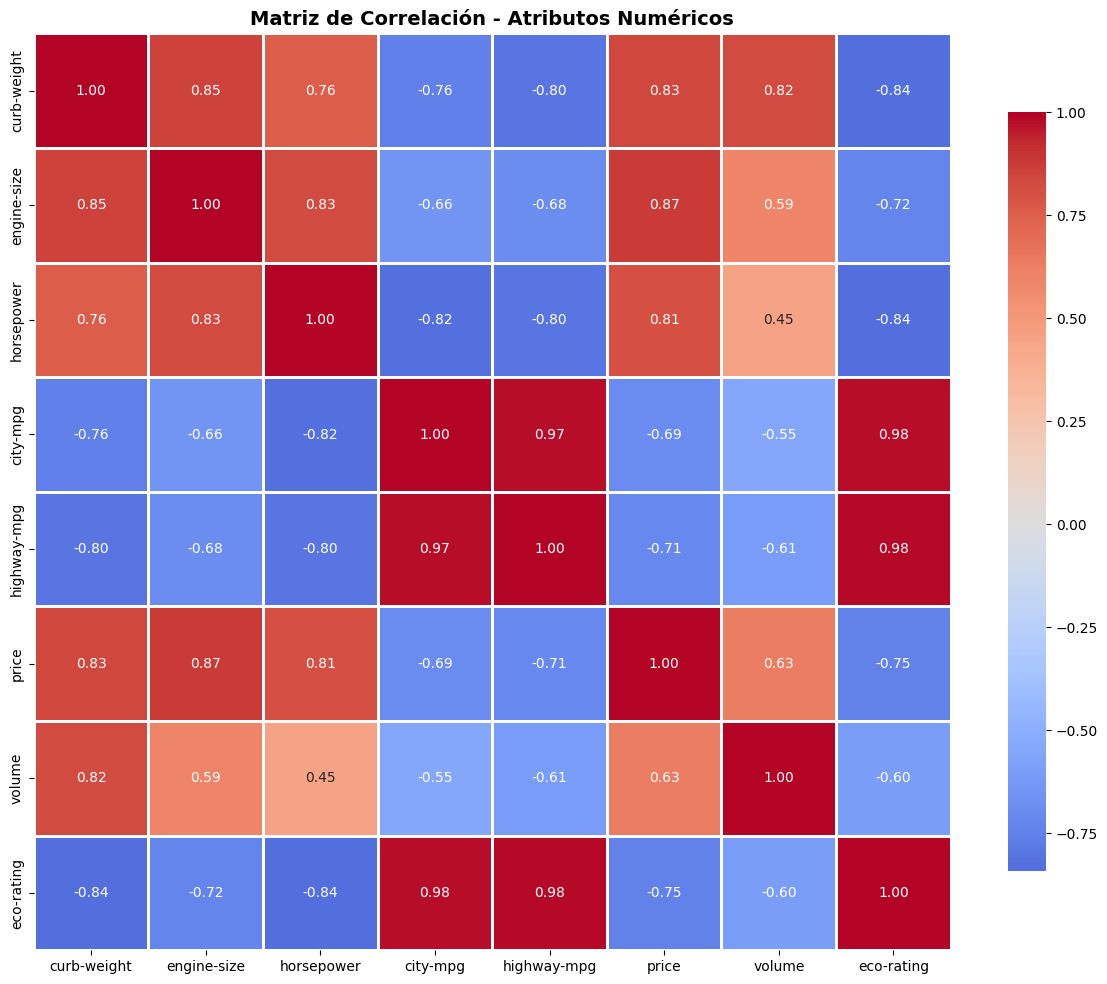


🔍 CORRELACIONES MÁS FUERTES:

Top 10 correlaciones más fuertes:


,Atributo 1,Atributo 2,Correlación
24,highway-mpg,eco-rating,0.984258
21,city-mpg,eco-rating,0.976650
18,city-mpg,highway-mpg,0.972407
10,engine-size,price,0.873708
0,curb-weight,engine-size,0.848932
6,curb-weight,eco-rating,-0.842957
17,horsepower,eco-rating,-0.839619
4,curb-weight,price,0.834732
7,engine-size,horsepower,0.825286
5,curb-weight,volume,0.822823



📝 INTERPRETACIÓN:
• Correlación cercana a +1: Relación positiva fuerte
• Correlación cercana a -1: Relación negativa fuerte
• Correlación cercana a  0: No hay relación lineal


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 100)
print("MATRIZ DE CORRELACIÓN - ATRIBUTOS NUMÉRICOS")
print("=" * 100)

# Seleccionar solo atributos numéricos (continuos y discretos)
atributos_numericos = ['curb-weight', 'engine-size', 
                       'horsepower', 'city-mpg', 'highway-mpg', 
                       'price', 'volume', 'eco-rating']

# Crear dataframe solo con atributos numéricos
df_numerico = df_clean[atributos_numericos]

# Calcular matriz de correlación
matriz_corr = df_numerico.corr()

print("\n📊 MATRIZ DE CORRELACIÓN:")
display(matriz_corr.round(3))

# Visualización con mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_corr, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Atributos Numéricos', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Encontrar correlaciones más fuertes (excluyendo la diagonal)
print("\n🔍 CORRELACIONES MÁS FUERTES:")
print("=" * 100)

# Crear lista de correlaciones sin la diagonal
correlaciones = []
for i in range(len(matriz_corr.columns)):
    for j in range(i+1, len(matriz_corr.columns)):
        correlaciones.append({
            'Atributo 1': matriz_corr.columns[i],
            'Atributo 2': matriz_corr.columns[j],
            'Correlación': matriz_corr.iloc[i, j]
        })

# Ordenar por valor absoluto de correlación
df_correlaciones = pd.DataFrame(correlaciones)
df_correlaciones['Correlación Abs'] = df_correlaciones['Correlación'].abs()
df_correlaciones = df_correlaciones.sort_values('Correlación Abs', ascending=False)

# Mostrar top 10 correlaciones más fuertes
print("\nTop 10 correlaciones más fuertes:")
display(df_correlaciones[['Atributo 1', 'Atributo 2', 'Correlación']].head(10))

# Análisis de interpretación
print("\n📝 INTERPRETACIÓN:")
print("• Correlación cercana a +1: Relación positiva fuerte")
print("• Correlación cercana a -1: Relación negativa fuerte")
print("• Correlación cercana a  0: No hay relación lineal")

### d) 
Realice el entrenamiento de un perceptrón para que aprenda a clasificar si un auto es ecológico. Tenga
en cuenta los siguientes pasos:

I. Utilice el atributo eco-rating para generar un nuevo atributo binario que determine si un auto es
ecológico o no. Un auto es considerado ecológico si el valor de eco-rating supera la media de
dicho atributo.

II. Genere y compare 3 modelos utilizando diferentes normalizaciones (Sin normalizar,
normalización lineal, normalización estándar.

III. Teniendo en cuenta la matriz de correlación del punto c) repita el punto II) eliminando dos
atributos fuertemente correlacionados (uno negativo y otro positivo). Compare y reflexione
sobre los resultados obtenidos.